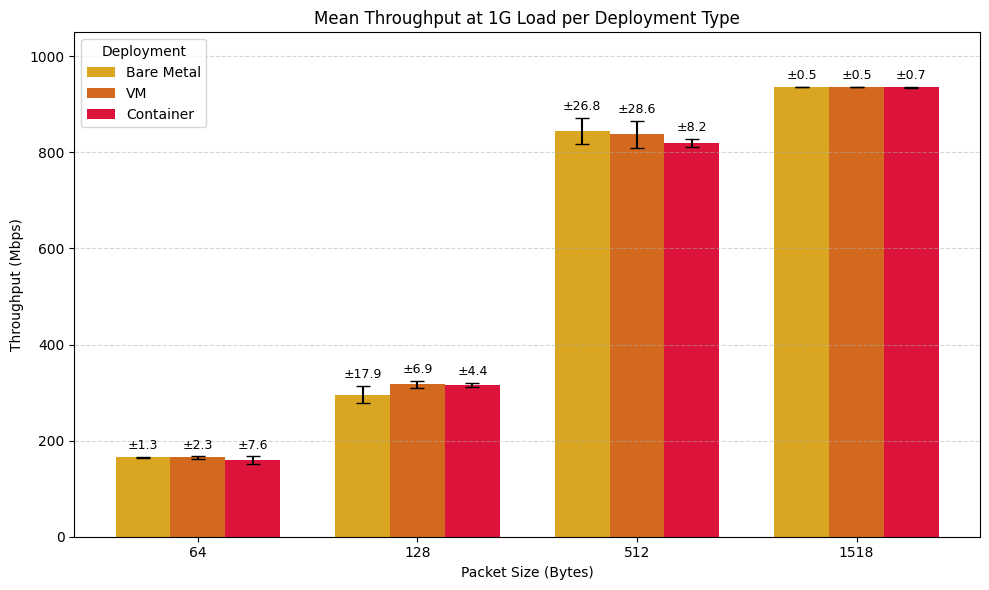

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Packet sizes
packet_sizes = [64, 128, 512, 1518]

# Mean throughput data
bare_metal_means = [165.3, 295.5, 844.4, 936.0]
vm_means         = [165.0, 316.9, 837.7, 935.7]
container_means  = [159.5, 315.7, 819.9, 935.3]

# Standard deviations (used as error bars = CI)
bare_metal_std = [1.3, 17.9, 26.8, 0.5]
vm_std         = [2.3, 6.9, 28.6, 0.5]
container_std  = [7.6, 4.4, 8.2, 0.7]

# Plot settings
bar_width = 0.25
x = np.arange(len(packet_sizes))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width, bare_metal_means, bar_width, yerr=bare_metal_std, label='Bare Metal', color='#DAA520', capsize=5)
bars2 = ax.bar(x, vm_means, bar_width, yerr=vm_std, label='VM', color='#D2691E', capsize=5)
bars3 = ax.bar(x + bar_width, container_means, bar_width, yerr=container_std, label='Container', color='#DC143C', capsize=5)

# Annotate with CI only
def annotate_ci_only(bars, stds):
    for bar, std in zip(bars, stds):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + std + 10,
                f'±{std:.1f}', ha='center', va='bottom', fontsize=9)

annotate_ci_only(bars1, bare_metal_std)
annotate_ci_only(bars2, vm_std)
annotate_ci_only(bars3, container_std)

# Formatting
ax.set_xlabel('Packet Size (Bytes)')
ax.set_ylabel('Throughput (Mbps)')
ax.set_title('Mean Throughput at 1G Load per Deployment Type')
ax.set_xticks(x)
ax.set_xticklabels(packet_sizes)
ax.legend(title='Deployment')
ax.set_ylim(0, 1050)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
